In [2]:
import pandas as pd 

In [87]:
df = pd.read_csv('mobile_autoplius.csv', sep=';')
df

,Unnamed: 0,gamintojas,metai,kaina,rida,pavaros,kuras,variklis
0,0,BMW 535 Gran Turismo,2014,16 801 €,173 000 km,Automatinė,Benzinas,"3.0 l., 225kW"
1,1,BMW 530,2014,12 900 €,248 000 km,Automatinė,Dyzelinas,"3.0 l., 190kW"
2,2,Skoda Superb,2017,18 500 €,181 000 km,Automatinė,Benzinas,"2.0 l., 206kW"
3,3,Volkswagen Eos,2007,2 950 €,Nenurodyta,Mechaninė,Dyzelinas,"2.0 l., 103kW"
4,4,Audi A1,2013,5 500 €,136 000 km,Mechaninė,Dyzelinas,"1.6 l., 66kW"
...,...,...,...,...,...,...,...,...
3995,3995,BMW X5,2011,9 500 €,320 525 km,Automatinė,Dyzelinas,"3.0 l., 225kW"
3996,3996,Mercedes-Benz Sprinter,2015,9 500 €,301 000 km,Mechaninė,Dyzelinas,"2.1 l., 95kW"
3997,3997,BMW 318,2013,9 500 €,305 000 km,Automatinė,Dyzelinas,"2.0 l., 105kW"
3998,3998,Toyota Yaris,2015,9 500 €,134 000 km,Automatinė,Benzinas / elektra,"1.5 l., 74kW"


In [88]:
df['metai'] = df['metai'].astype(int)
df['kaina'] = df['kaina'].str.replace('€', '').str.replace(' ', '').astype(float)

df['rida'] = df['rida'].apply(lambda x: x.replace('km', '').replace(' ', '') if 'km' in x else 'Nenurodyta')
df['rida'] = pd.to_numeric(df['rida'], errors='coerce')

df['kW'] = df['variklis'].str.extract(r'(\d+)kW')[0]
df['kW'] = pd.to_numeric(df['kW'], errors='coerce')

df.head(100)



,Unnamed: 0,gamintojas,metai,kaina,rida,pavaros,kuras,variklis,kW
0,0,BMW 535 Gran Turismo,2014,16801.0,173000.0,Automatinė,Benzinas,"3.0 l., 225kW",225.0
1,1,BMW 530,2014,12900.0,248000.0,Automatinė,Dyzelinas,"3.0 l., 190kW",190.0
2,2,Skoda Superb,2017,18500.0,181000.0,Automatinė,Benzinas,"2.0 l., 206kW",206.0
3,3,Volkswagen Eos,2007,2950.0,NaN,Mechaninė,Dyzelinas,"2.0 l., 103kW",103.0
4,4,Audi A1,2013,5500.0,136000.0,Mechaninė,Dyzelinas,"1.6 l., 66kW",66.0
...,...,...,...,...,...,...,...,...,...
95,95,BMW 118,2008,3900.0,284846.0,Automatinė,Dyzelinas,"2.0 l., 105kW",105.0
96,96,Mercedes-Benz E220,2008,3900.0,375026.0,Automatinė,Dyzelinas,"2.2 l., 125kW",125.0
97,97,Volkswagen Touareg,2006,4000.0,288654.0,Automatinė,Dyzelinas,"3.0 l., 165kW",165.0
98,98,BMW 535,2009,4150.0,455691.0,Automatinė,Dyzelinas,"3.0 l., 210kW",210.0


In [89]:
# Pašalinami eilutės su trūkstamais reikšmėmis nurodytuose stulpeliuose
df.dropna(subset=['rida', 'kW', 'kaina', 'kuras', 'pavaros'], inplace=True)

df

,Unnamed: 0,gamintojas,metai,kaina,rida,pavaros,kuras,variklis,kW
0,0,BMW 535 Gran Turismo,2014,16801.0,173000.0,Automatinė,Benzinas,"3.0 l., 225kW",225.0
1,1,BMW 530,2014,12900.0,248000.0,Automatinė,Dyzelinas,"3.0 l., 190kW",190.0
2,2,Skoda Superb,2017,18500.0,181000.0,Automatinė,Benzinas,"2.0 l., 206kW",206.0
4,4,Audi A1,2013,5500.0,136000.0,Mechaninė,Dyzelinas,"1.6 l., 66kW",66.0
5,5,Audi A6,2012,9900.0,261011.0,Automatinė,Dyzelinas,"3.0 l., 150kW",150.0
...,...,...,...,...,...,...,...,...,...
3995,3995,BMW X5,2011,9500.0,320525.0,Automatinė,Dyzelinas,"3.0 l., 225kW",225.0
3996,3996,Mercedes-Benz Sprinter,2015,9500.0,301000.0,Mechaninė,Dyzelinas,"2.1 l., 95kW",95.0
3997,3997,BMW 318,2013,9500.0,305000.0,Automatinė,Dyzelinas,"2.0 l., 105kW",105.0
3998,3998,Toyota Yaris,2015,9500.0,134000.0,Automatinė,Benzinas / elektra,"1.5 l., 74kW",74.0


In [85]:
print(df['kuras'].unique())

['Benzinas' 'Dyzelinas' 'Benzinas / elektra' 'Dyzelinas / elektra'
 'Benzinas / dujos' 'Elektra' 'Elektra, 24 kWh'
 'Benzinas / elektra / dujos' 'Elektra, 30 kWh' 'Elektra, 55 kWh'
 'Elektra, 50 kWh' 'Elektra, 82 kWh' 'Elektra, 100 kWh' 'Elektra, 6 kWh'
 'Elektra, 15 kWh' 'Elektra, 44 kWh' 'Elektra, 26 kWh' 'Elektra, 27 kWh'
 'Elektra, 28 kWh']


In [90]:
# Kategorinių reikšmių paverčiamos skaitinėmis reprezentacijomis stulpelyje 'kuras'
df['kuras'] = df['kuras'].map({
    'Benzinas': 0, 
    'Dyzelinas': 1, 
    'Elektra': 2, 
    'Benzinas / elektra': 3, 
    'Dyzelinas / elektra': 4, 
    'Benzinas / dujos': 5
})
# Tuščios reikšmės stulpelyje 'kuras' užpildomos -1 ir paverčiamos sveikaisiais skaičiais
df['kuras'] = df['kuras'].fillna(-1).astype(int)

# Kategorinių reikšmių paverčiamos skaitinėmis reprezentacijomis stulpelyje 'pavaros'
df['pavaros'] = df['pavaros'].map({
    'Mechaninė': 0, 
    'Automatinė': 1
})

df


,Unnamed: 0,gamintojas,metai,kaina,rida,pavaros,kuras,variklis,kW
0,0,BMW 535 Gran Turismo,2014,16801.0,173000.0,1,0,"3.0 l., 225kW",225.0
1,1,BMW 530,2014,12900.0,248000.0,1,1,"3.0 l., 190kW",190.0
2,2,Skoda Superb,2017,18500.0,181000.0,1,0,"2.0 l., 206kW",206.0
4,4,Audi A1,2013,5500.0,136000.0,0,1,"1.6 l., 66kW",66.0
5,5,Audi A6,2012,9900.0,261011.0,1,1,"3.0 l., 150kW",150.0
...,...,...,...,...,...,...,...,...,...
3995,3995,BMW X5,2011,9500.0,320525.0,1,1,"3.0 l., 225kW",225.0
3996,3996,Mercedes-Benz Sprinter,2015,9500.0,301000.0,0,1,"2.1 l., 95kW",95.0
3997,3997,BMW 318,2013,9500.0,305000.0,1,1,"2.0 l., 105kW",105.0
3998,3998,Toyota Yaris,2015,9500.0,134000.0,1,3,"1.5 l., 74kW",74.0


In [32]:
from sklearn.model_selection import train_test_split

In [92]:
X = df[['metai', 'rida', 'kW', 'kuras', 'pavaros']]
y = df['kaina']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [101]:
models = {
    'Linear Regression':
LinearRegression(),
    'Polynomial Regression':
make_pipeline(PolynomialFeatures(degree=2), Ridge()),
    'Decision Tree':
DecisionTreeRegressor(),
    'Random Forest':
RandomForestRegressor()
}

param_grids = {
'Polynomial Regression': {
    'ridge__alpha': [0.1, 1.0, 10.0]
},
'Decision Tree': {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
},
'Random Forest': {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}}


In [102]:
results = {}

for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    y_pred = best_model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f'{name}: RMSE={rmse}, R2 = {r2}')
    

c:\Users\ostap\Desktop\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ostap\Desktop\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression: RMSE=4918.455954675115, R2 = 0.484774884650669
Polynomial Regression: RMSE=3618.2448256815824, R2 = 0.7211726627094577


c:\Users\ostap\Desktop\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree: RMSE=4000.149844818941, R2 = 0.6592059745694651
Random Forest: RMSE=3467.039362799958, R2 = 0.7439899603884976


c:\Users\ostap\Desktop\Mokymai\Duomenu_mokslas\mokymai\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [103]:
import matplotlib.pyplot as plt

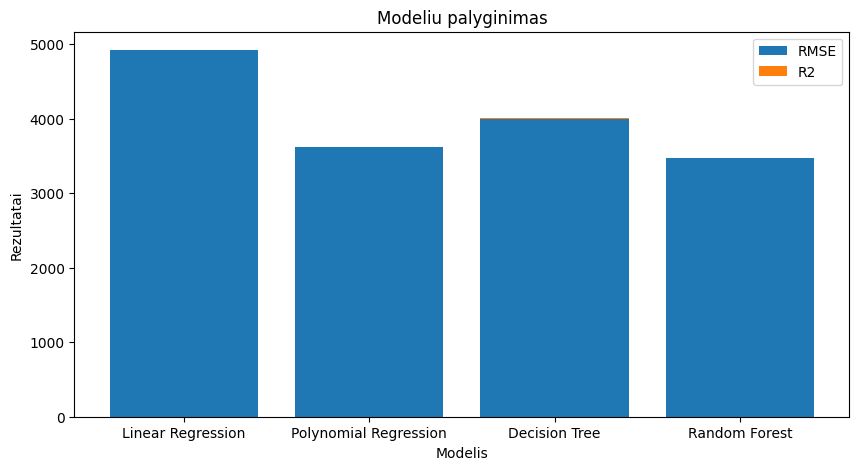

In [105]:
plt.figure(figsize=(10, 5))

# Sukuriamas RMSE ir R^2 rezultatų sąrašai
rmse_values = [results[model]['RMSE'] for model in results]
r2_values = [results[model]['R2'] for model in results]

# Piešiama juostinė diagrama
plt.bar(results.keys(), rmse_values, label = 'RMSE')
plt.bar(results.keys(), r2_values, bottom=rmse_values, label='R2')

# Papildomi diagramos nustatymai
plt.xlabel('Modelis')
plt.ylabel('Rezultatai')
plt.title('Modeliu palyginimas')
plt.legend()

# Rodyti diagramą
plt.show()

In [106]:
import joblib

class CarPricePredictor:
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)
    
best_model_name = min(results, key=lambda k: results[k]["RMSE"])
best_model = grid_search.best_estimator_ if best_model_name in param_grids else models[best_model_name]
best_model.fit(X_train_scaled, y_train)
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']